# Tutorial 2 - Read, manipulate and analyze the 2A-DPR product

First, let's import the package required in this tutorial.

In [45]:
import gpm_api
import datetime

# 1. Data download

Now let's download the 2A-DPR product over a couple of hours.

In [46]:
# Specify the time period you are interested in 
start_time = datetime.datetime.strptime("2020-07-05 02:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2020-07-05 06:00:00", "%Y-%m-%d %H:%M:%S")
# Specify the product and product type 
product = "2A-DPR"    # 2A-PR
product_type = "RS"   
# Specify the version
version = 7

In [47]:
# Download the data
gpm_api.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)


0it [00:00, ?it/s]
0it [00:00, ?it/s]

The available GPM 2A-DPR product files are on disk.


Once, the data are downloaded on disk, let's load the 2A-DPR product and look at the dataset structure.

## 2. Data Loading

In [48]:
# Load the 2A-DPR dataset
# - If chunks is not None, it does not load the data in RAM memory !
# - If scan_mode is not specified, it automatically load one! 
ds = gpm_api.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    chunks="auto",
)
ds

'scan_mode' has not been specified. Default to FS.


<xarray.Dataset>
Dimensions:                                 (cross_track: 49,
                                             along_track: 20573, nfreqHI: 3,
                                             range: 176, nNode: 5, nbinSZP: 7,
                                             frequency: 2, DSD_params: 2,
                                             nNUBF: 3, LS: 2, method: 6,
                                             three: 3, foreBack: 2, nearFar: 2,
                                             nsdew: 3, four: 4, nNP: 4, XYZ: 3)
Coordinates:
    lon                                     (cross_track, along_track) float32 ...
    lat                                     (cross_track, along_track) float32 ...
    time                                    (along_track) datetime64[ns] 2020...
    gpm_id                                  (along_track) <U10 ...
    gpm_granule_id                          (along_track) int64 ...
    gpm_cross_track_id                      (cross_track) int64 ...
    gpm_along_track_id                      (along_track) int64 ...
    gpm_range_id                            (range) int64 ...
  * frequency                               (frequency) <U2 'Ku' 'Ka'
    crsWGS84                                int64 0
Dimensions without coordinates: cross_track, along_track, nfreqHI, range,
                                nNode, nbinSZP, DSD_params, nNUBF, LS, method,
                                three, foreBack, nearFar, nsdew, four, nNP, XYZ
Data variables: (12/139)
    sunLocalTime                            (cross_track, along_track) timedelta64[ns] dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/flagBB                              (cross_track, along_track) float64 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binBBPeak                           (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binBBTop                            (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binDFRmMLBottom                     (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binDFRmMLTop                        (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    ...                                      ...
    scanStatus/pointingStatus               (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/acsModeMidScan               (along_track) float32 dask.array<chunksize=(5803,), meta=np.ndarray>
    scanStatus/targetSelectionMidScan       (along_track) float32 dask.array<chunksize=(5803,), meta=np.ndarray>
    scanStatus/operationalMode              (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/limitErrorFlag               (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/FractionalGranuleNumber      (along_track) float64 dask.array<chunksize=(5803,), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20200705-S013508-E030740.03...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2023-07-11 1...
    gpm_api_product:       2A-DPR

If you want to load another `scan_mode`, first have a look at the available ones:

In [49]:
gpm_api.available_scan_modes(product=product, version=version)

['FS', 'HS']

and then specify the `scan_mode` argument in `open_dataset`:

In [50]:
ds = gpm_api.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    scan_mode="FS",
    chunks="auto",
)
ds

<xarray.Dataset>
Dimensions:                                 (cross_track: 49,
                                             along_track: 20573, nfreqHI: 3,
                                             range: 176, nNode: 5, nbinSZP: 7,
                                             frequency: 2, DSD_params: 2,
                                             nNUBF: 3, LS: 2, method: 6,
                                             three: 3, foreBack: 2, nearFar: 2,
                                             nsdew: 3, four: 4, nNP: 4, XYZ: 3)
Coordinates:
    lon                                     (cross_track, along_track) float32 ...
    lat                                     (cross_track, along_track) float32 ...
    time                                    (along_track) datetime64[ns] 2020...
    gpm_id                                  (along_track) <U10 ...
    gpm_granule_id                          (along_track) int64 ...
    gpm_cross_track_id                      (cross_track) int64 ...
    gpm_along_track_id                      (along_track) int64 ...
    gpm_range_id                            (range) int64 ...
  * frequency                               (frequency) <U2 'Ku' 'Ka'
    crsWGS84                                int64 0
Dimensions without coordinates: cross_track, along_track, nfreqHI, range,
                                nNode, nbinSZP, DSD_params, nNUBF, LS, method,
                                three, foreBack, nearFar, nsdew, four, nNP, XYZ
Data variables: (12/139)
    sunLocalTime                            (cross_track, along_track) timedelta64[ns] dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/flagBB                              (cross_track, along_track) float64 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binBBPeak                           (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binBBTop                            (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binDFRmMLBottom                     (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    CSF/binDFRmMLTop                        (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    ...                                      ...
    scanStatus/pointingStatus               (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/acsModeMidScan               (along_track) float32 dask.array<chunksize=(5803,), meta=np.ndarray>
    scanStatus/targetSelectionMidScan       (along_track) float32 dask.array<chunksize=(5803,), meta=np.ndarray>
    scanStatus/operationalMode              (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/limitErrorFlag               (along_track, frequency) float32 dask.array<chunksize=(5803, 2), meta=np.ndarray>
    scanStatus/FractionalGranuleNumber      (along_track) float64 dask.array<chunksize=(5803,), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20200705-S013508-E030740.03...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2023-07-11 1...
    gpm_api_product:       2A-DPR

You can list variables, coordinates and dimensions with the following methods

In [51]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates 
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions 
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['sunLocalTime', 'CSF/flagBB', 'CSF/binBBPeak', 'CSF/binBBTop', 'CSF/binDFRmMLBottom', 'CSF/binDFRmMLTop', 'CSF/binBBBottom', 'CSF/binHeavyIcePrecipTop', 'CSF/binHeavyIcePrecipBottom', 'CSF/nHeavyIcePrecip', 'CSF/flagMLquality', 'CSF/heightBB', 'CSF/widthBB', 'CSF/qualityBB', 'CSF/typePrecip', 'CSF/qualityTypePrecip', 'CSF/flagShallowRain', 'CSF/flagHeavyIcePrecip', 'CSF/flagAnvil', 'CSF/flagHail', 'DSD/phase', 'DSD/binNode', 'DSD/paramRDm', 'Experimental/precipRateESurface2', 'Experimental/precipRateESurface2Status', 'Experimental/sigmaZeroProfile', 'Experimental/seaIceConcentration', 'Experimental/flagSurfaceSnowfall', 'Experimental/flagGraupelHail', 'Experimental/binMixedPhaseTop', 'Experimental/surfaceSnowfallIndex', 'FLG/flagEcho', 'FLG/qualityData', 'FLG/qualityFlag', 'FLG/flagSensor', 'FLG/flagScanPattern', 'PRE/elevation', 'PRE/landSurfaceType', 'PRE/localZenithAngle', 'PRE/flagPrecip', 'PRE/flagSigmaZeroSaturation', 'PRE/binRealSurface', 'PRE/binStormTop'

As you see, every variable has a prefix which indicates the group in the original HDF file where the variable is stored. 
You can remove the prefix when opening the dataset by specifying `prefix_group=False`. 
You can also directly load only a subset of variables, by specifying the `variables` argument. 

In [52]:
# List some variables of interest 
variables = [
    "airTemperature",
    "precipRate",
    "paramDSD",
    "zFactorFinal",
    "zFactorMeasured",
    "precipRateNearSurface",
    "precipRateESurface",
    "precipRateESurface2",
    "zFactorFinalESurface",
    "zFactorFinalNearSurface",
    "heightZeroDeg",
    "binEchoBottom",
    "landSurfaceType",
]
# Load the dataset
ds = gpm_api.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=variables,
    prefix_group=False,
)
ds

'scan_mode' has not been specified. Default to FS.


<xarray.Dataset>
Dimensions:                  (cross_track: 49, along_track: 20573, range: 176,
                              frequency: 2, DSD_params: 2)
Coordinates:
    height                   (cross_track, along_track, range) float32 dask.array<chunksize=(38, 4219, 139), meta=np.ndarray>
    lon                      (cross_track, along_track) float32 ...
    lat                      (cross_track, along_track) float32 ...
    time                     (along_track) datetime64[ns] 2020-07-05T02:00:00...
    gpm_id                   (along_track) <U10 ...
    gpm_granule_id           (along_track) int64 ...
    gpm_cross_track_id       (cross_track) int64 ...
    gpm_along_track_id       (along_track) int64 ...
    gpm_range_id             (range) int64 ...
  * frequency                (frequency) <U2 'Ku' 'Ka'
  * DSD_params               (DSD_params) <U2 'Nw' 'Dm'
    crsWGS84                 int64 0
Dimensions without coordinates: cross_track, along_track, range
Data variables: (12/13)
    precipRateESurface2      (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    landSurfaceType          (cross_track, along_track) float64 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    zFactorMeasured          (cross_track, along_track, range, frequency) float32 dask.array<chunksize=(37, 4390, 139, 1), meta=np.ndarray>
    binEchoBottom            (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    paramDSD                 (cross_track, along_track, range, DSD_params) float32 dask.array<chunksize=(37, 4390, 139, 1), meta=np.ndarray>
    precipRate               (cross_track, along_track, range) float32 dask.array<chunksize=(38, 4219, 139), meta=np.ndarray>
    ...                       ...
    precipRateNearSurface    (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
    zFactorFinal             (cross_track, along_track, range, frequency) float32 dask.array<chunksize=(37, 4390, 139, 1), meta=np.ndarray>
    zFactorFinalESurface     (cross_track, along_track, frequency) float32 dask.array<chunksize=(49, 5803, 2), meta=np.ndarray>
    zFactorFinalNearSurface  (cross_track, along_track, frequency) float32 dask.array<chunksize=(49, 5803, 2), meta=np.ndarray>
    airTemperature           (cross_track, along_track, range) float32 dask.array<chunksize=(38, 4219, 139), meta=np.ndarray>
    heightZeroDeg            (cross_track, along_track) float32 dask.array<chunksize=(49, 5803), meta=np.ndarray>
Attributes: (12/23)
    FileName:              2A.GPM.DPR.V9-20211125.20200705-S013508-E030740.03...
    EphemerisFileName:     
    AttitudeFileName:      
    TotalQualityCode:      Good
    DielectricFactorKa:    0.8989
    DielectricFactorKu:    0.9255
    ...                    ...
    DataFormatVersion:     7h
    MetadataVersion:       7h
    ProcessingMode:        STD
    ScanMode:              FS
    history:               Created by ghiggi/gpm_api software on 2023-07-11 1...
    gpm_api_product:       2A-DPR

To select the DataArray corresponding to a single variable:

In [53]:
variable = 'precipRateNearSurface'
da = ds[variable]
da

<xarray.DataArray 'precipRateNearSurface' (cross_track: 49, along_track: 20573)>
dask.array<getitem, shape=(49, 20573), dtype=float32, chunksize=(49, 7934), chunktype=numpy.ndarray>
Coordinates:
    lon                 (cross_track, along_track) float32 ...
    lat                 (cross_track, along_track) float32 ...
    time                (along_track) datetime64[ns] 2020-07-05T02:00:00 ... ...
    gpm_id              (along_track) <U10 ...
    gpm_granule_id      (along_track) int64 ...
    gpm_cross_track_id  (cross_track) int64 ...
    gpm_along_track_id  (along_track) int64 ...
    crsWGS84            int64 0
Dimensions without coordinates: cross_track, along_track
Attributes:
    units:            mm/hr
    gpm_api_product:  2A-DPR
    grid_mapping:     crsWGS84
    coordinates:      lat lon

To extract from the DataArray the numerical array you use:

In [54]:
print("Data type of numerical array: ", type(da.data))
da.data

Data type of numerical array:  <class 'dask.array.core.Array'>


dask.array<getitem, shape=(49, 20573), dtype=float32, chunksize=(49, 7934), chunktype=numpy.ndarray>

If the numerical array data type is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [55]:
# Option 1 
da_opt1 = da.compute()
print("Data type of numerical array: ", type(da_opt1.data))
da_opt1.data

Data type of numerical array:  <class 'numpy.ndarray'>


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
# Option 2
print("Data type of numerical array: ", type(da.data.compute()))
da.data.compute()

Data type of numerical array:  <class 'numpy.ndarray'>


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 3. Dataset manipulations

Now, let's first have a look at the methods provided by GPM-API

In [57]:
variable = "precipRateNearSurface"
da = ds[variable]
print("xr.Dataset gpm_api methods:", dir(ds.gpm_api))
print("")
print("xr.DataArray gpm_api methods:", dir(da.gpm_api))


xr.Dataset gpm_api methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obj', 'crop', 'crop_by_continent', 'crop_by_country', 'end_time', 'get_crop_slices_by_continent', 'get_crop_slices_by_country', 'get_crop_slices_by_extent', 'get_slices_contiguous_granules', 'get_slices_contiguous_scans', 'get_slices_regular', 'get_slices_regular_time', 'get_slices_valid_geolocation', 'has_contiguous_scans', 'has_missing_granules', 'has_regular_time', 'has_valid_geolocation', 'is_grid', 'is_orbit', 'is_regular', 'is_spatial_2d', 'plot_image', 'plot_map', 'plot_swath_lines', 'plot_transect_line', 'pyresample_area', 'start_time', 'subset_by_time', 'subset_by_time_slice', 'title']

xr.DataArray gpm_api m

You can also select the reflectivity volumes at a given frequency with the `sel` method:

In [58]:
ds["zFactorFinal"].sel(frequency='Ka')

<xarray.DataArray 'zFactorFinal' (cross_track: 49, along_track: 20573,
                                  range: 176)>
dask.array<getitem, shape=(49, 20573, 176), dtype=float32, chunksize=(37, 6521, 139), chunktype=numpy.ndarray>
Coordinates:
    height              (cross_track, along_track, range) float32 dask.array<chunksize=(38, 4219, 139), meta=np.ndarray>
    lon                 (cross_track, along_track) float32 ...
    lat                 (cross_track, along_track) float32 ...
    time                (along_track) datetime64[ns] 2020-07-05T02:00:00 ... ...
    gpm_id              (along_track) <U10 ...
    gpm_granule_id      (along_track) int64 ...
    gpm_cross_track_id  (cross_track) int64 ...
    gpm_along_track_id  (along_track) int64 ...
    gpm_range_id        (range) int64 ...
    frequency           <U2 'Ka'
    crsWGS84            int64 0
Dimensions without coordinates: cross_track, along_track, range
Attributes:
    units:            dBZ
    gpm_api_product:  2A-DPR
    grid_mapping:     crsWGS84
    coordinates:      lat lon

The GPM products are either ORBIT (i.e. PMW and RADAR) or GRID (i.e. IMERG) based.
You can check the support of the data with the methods `is_grid` and `is_orbit`. 

In [59]:
print("Is GPM ORBIT data?: ", ds.gpm_api.is_orbit)
print("Is GPM GRID data?: ", ds.gpm_api.is_grid)

Is GPM ORBIT data?:  True
Is GPM GRID data?:  False


To check Whether the loaded GPM 2A-DPR product has contiguous scans, you can use:

In [60]:
print(ds.gpm_api.has_contiguous_scans)
print(ds.gpm_api.is_regular)

True
True


In case there are non-contiguous scans, you can obtain the along-track slices over which the dataset is regular:

In [61]:
list_slices = ds.gpm_api.get_slices_contiguous_scans() 
print(list_slices)

[slice(0, 20573, None)]


You can then select a regular portion of the dataset with:

In [62]:
slc = list_slices[0]
print(slc)

slice(0, 20573, None)


In [63]:
ds_regular = ds.isel(along_track=slc)

To instead check if the open dataset has a single or multiple timestep, you can use: 

In [64]:
ds.gpm_api.is_spatial_2d # because the xr.Dataset also contains the range and frequency dimensions ! 

False

In [65]:
ds["zFactorFinal"].isel(range=0).sel(frequency='Ka').gpm_api.is_spatial_2d

True

In [66]:
ds["precipRateNearSurface"].gpm_api.is_spatial_2d

True

## 4. Product visualization

The GPM-API provides two ways of displaying the data:
- The `plot_map` method plot the data in a geographic projection using the Cartopy `pcolormesh` method
- The `plot_image` method plot the data as an image using the Maplotlib `imshow` method

Let's start by plotting the DPR scan in the geographic space

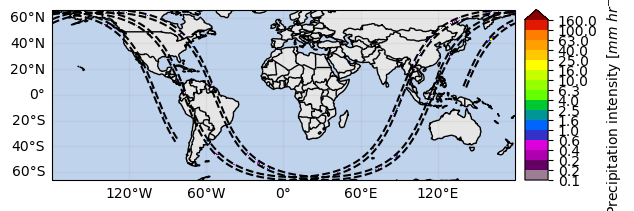

In [67]:
ds[variable].gpm_api.plot_map()     

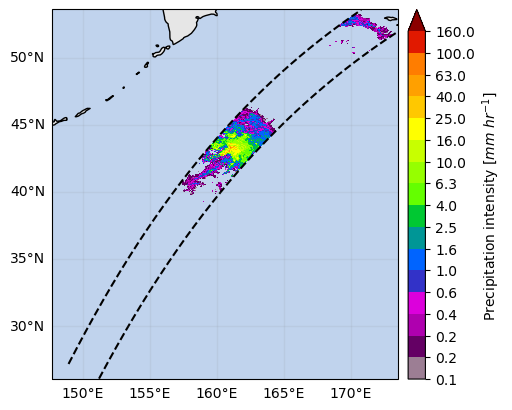

In [68]:
ds[variable].isel(along_track=slice(500,1200)).gpm_api.plot_map()    

and now as an image, in "swath" view:

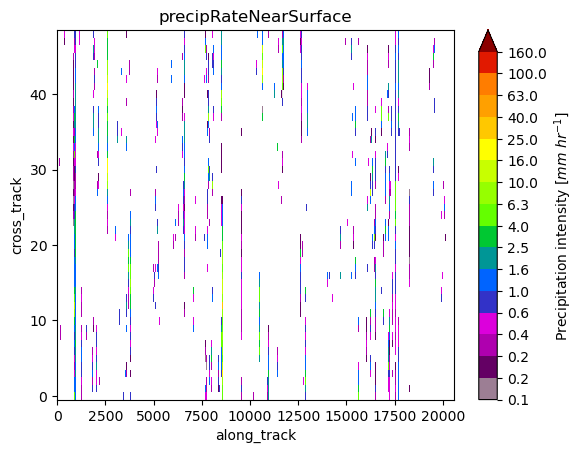

In [69]:
ds[variable].gpm_api.plot_image()

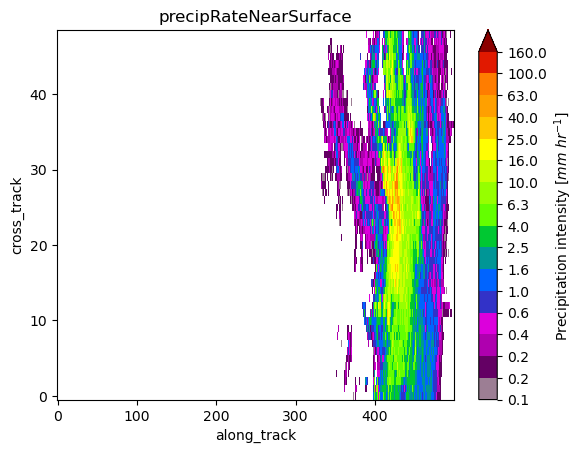

In [70]:
ds[variable].isel(along_track=slice(500, 1000)).gpm_api.plot_image()

To facilitate the creation of a figure title, GPM-API also provide a `title` method:

In [71]:
# Title for a single-timestep dataset
print(ds[variable].gpm_api.title(add_timestep=True))
print(ds[variable].gpm_api.title(add_timestep=False))

2A-DPR PrecipRateNearSurface (2020-07-05 04:00)
2A-DPR PrecipRateNearSurface


To instead zoom on a specific regions of a `plot_map` figure, you can use the axis method `set_extent`. 

Extent:  (-171.99111060299998, -66.76465999999999, 18.71619, 71.5577635769)


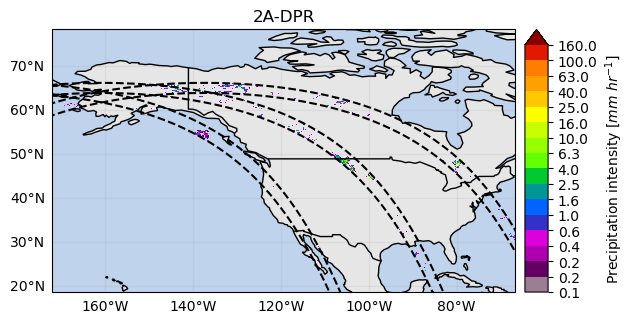

In [72]:
from gpm_api.utils.countries import get_country_extent
title = ds.gpm_api.title(add_timestep=False)
extent = get_country_extent("United States")
print("Extent: ", extent)
da = ds[variable]
p = da.gpm_api.plot_map()  
_ = p.axes.set_extent(extent)
_ = p.axes.set_title(label=title)

You can also customize the geographic projection, by specifying the wished Cartopy projection.
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections)

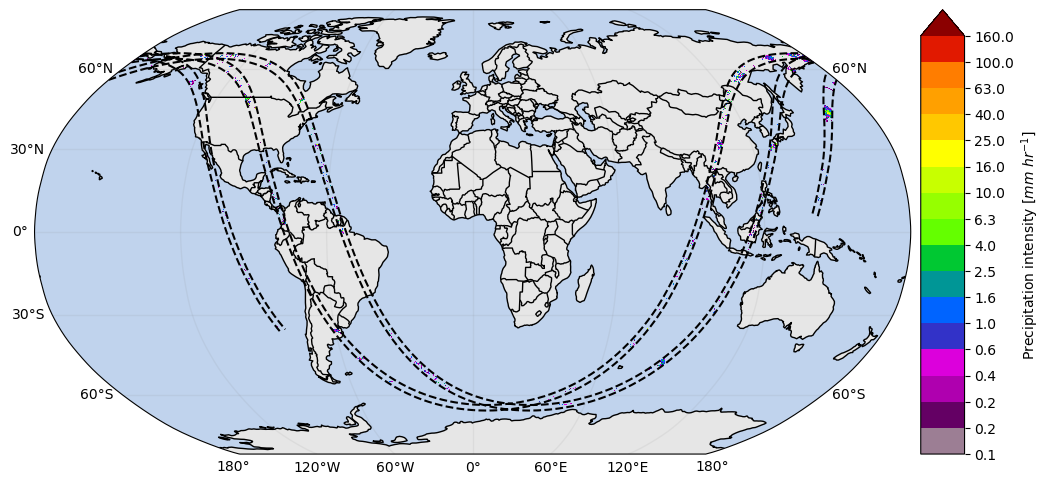

In [73]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from gpm_api.visualization.plot import plot_cartopy_background

# Define some figure options
dpi = 100
figsize = (12, 10)

# Example of Cartopy projections
crs_proj = ccrs.Robinson()

# Select a single variable
da = ds[variable]

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
plot_cartopy_background(ax)
da.gpm_api.plot_map(ax=ax)
ax.set_global()

It is possible to further customize these figures in multiply ways. For example by specifying the own colormap:

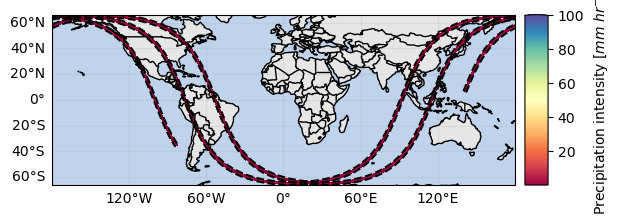

In [74]:
da.gpm_api.plot_map(cmap="Spectral", vmin=0.1, vmax=100)

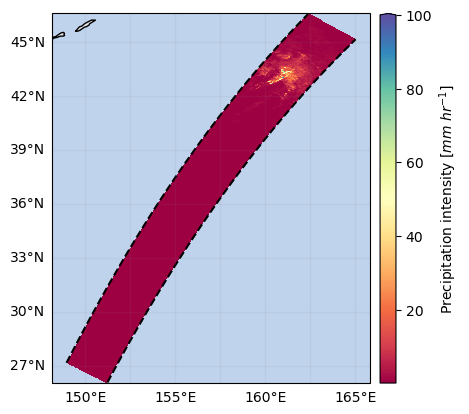

In [75]:
da = ds[variable]
da.isel(along_track=slice(500, 1000)).gpm_api.plot_map(cmap="Spectral", vmin=0.1, vmax=100)

However, note that GPM-API can provide a large set of pre-defined colormaps and colorbar settings.

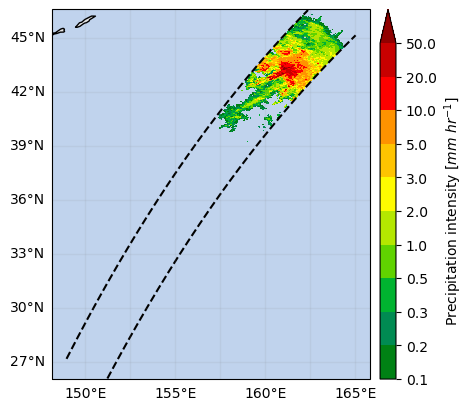

In [76]:
from gpm_api.utils.utils_cmap import get_colorbar_settings
plot_kwargs, cbar_kwargs =  get_colorbar_settings("IMERG_Liquid")
da.isel(along_track=slice(500, 1000)).gpm_api.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

## 5. Dataset cropping

GPM-API provides methods to easily spatially subset orbits by extent, country or continent.
Note however, that an area can be crossed by multiple orbits. In other words, multiple orbit slices in along-track direction can intersect the area of interest. The method `get_crop_slices_by_extent`, `get_crop_slices_by_country` and ` get_crop_slices_by_continent` enable to retrieve the orbit portions intersecting the area of interest. 

[slice(1444, 3113, None), slice(9654, 11303, None), slice(17814, 19236, None)]


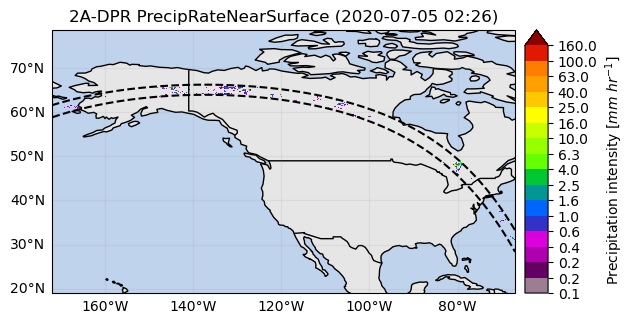

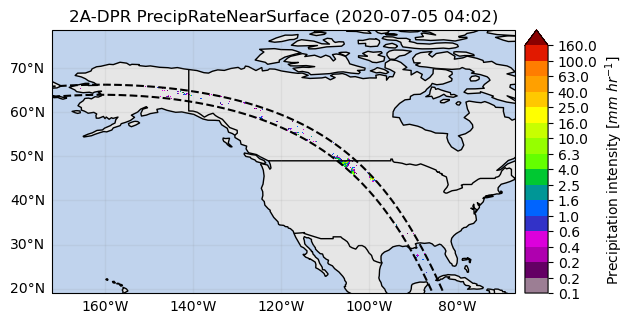

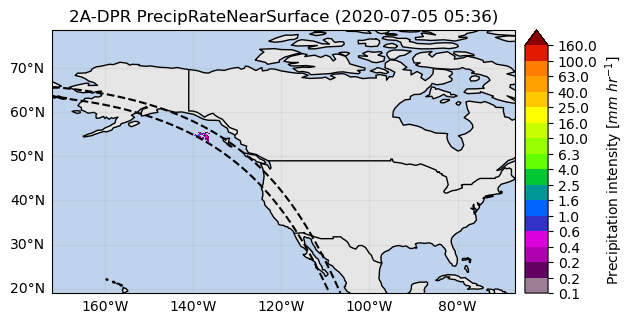

In [77]:
# Crop by extent                                      
extent = (-172, -67, 19, 72) # (xmin, xmax, ymin, ymax)
list_slices = ds.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
for slc in list_slices:
    da_subset = ds[variable].isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map()  
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)


[slice(1444, 3124, None), slice(9654, 11310, None), slice(17814, 19243, None)]
[slice(1444, 3124, None), slice(9654, 11310, None), slice(17814, 19243, None)]


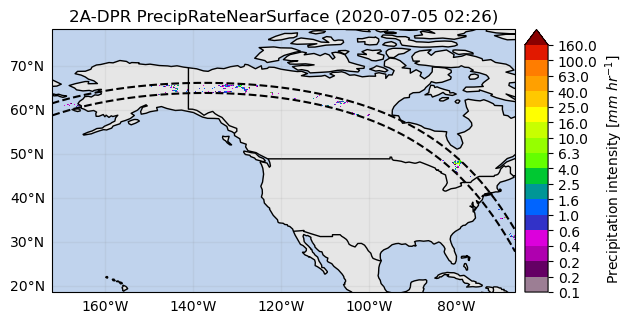

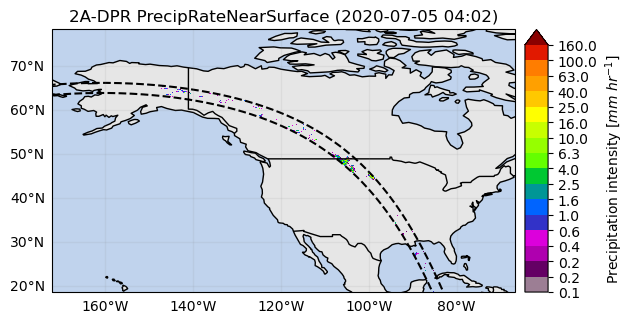

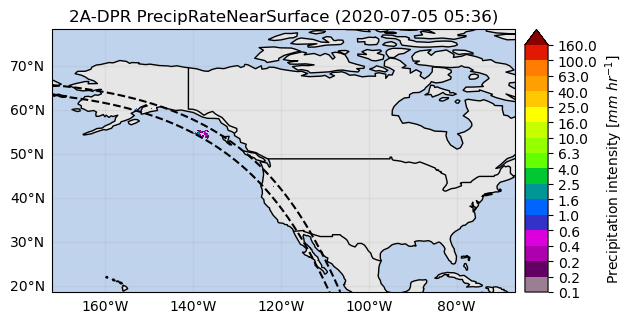

In [78]:
# Crop by country
# - Option 1
list_slices = ds.gpm_api.get_crop_slices_by_country("United States")
print(list_slices)
# - Option 2
from gpm_api.utils.countries import get_country_extent 
extent = get_country_extent("United States")
list_slices = ds.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
# - Plot the swath crossing the country
for slc in list_slices:
    da_subset = ds[variable].isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map()  
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)

[slice(3443, 4950, None), slice(11377, 13333, None), slice(20442, 20573, None)]
[slice(3443, 4950, None), slice(11377, 13333, None), slice(20442, 20573, None)]


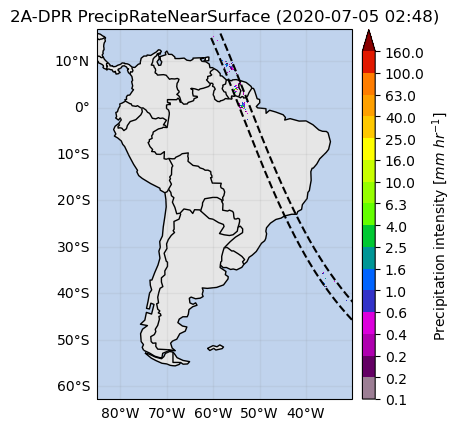

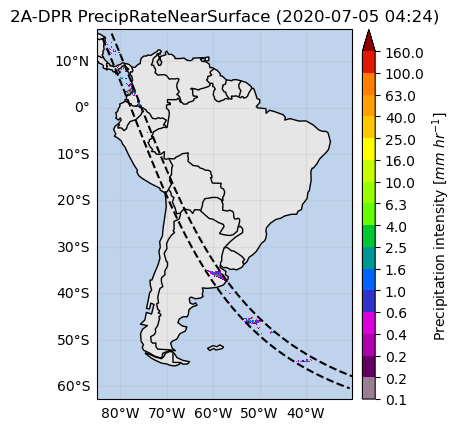

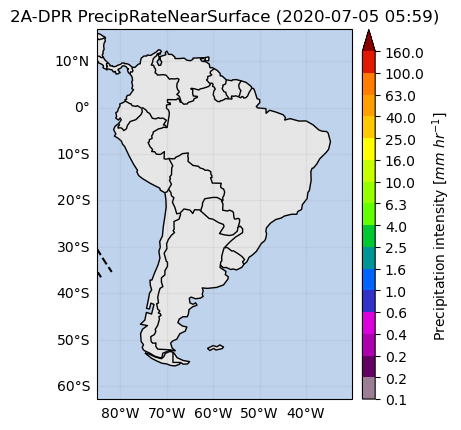

In [79]:
# Crop by continent          
# - Option 1
list_slices = ds.gpm_api.get_crop_slices_by_continent("South America")
print(list_slices)
# - Option 2
from gpm_api.utils.continents import get_continent_extent 
extent = get_continent_extent("South America")
list_slices = ds.gpm_api.get_crop_slices_by_extent(extent)
print(list_slices)
# - Plot the swath crossing the country
for slc in list_slices:
    da_subset = ds[variable].isel(along_track=slc)
    slice_title = da_subset.gpm_api.title(add_timestep=True)
    p = da_subset.gpm_api.plot_map()  
    p.axes.set_extent(extent)
    p.axes.set_title(label=slice_title)


## 6. Precipitating area patch extraction

GPM-API comes with utilities helping the extraction of precipitating areas. 
Go through the dedicated tutorial to discover all the details !!!